## GOAL
* Create a model to predict whether or not a customer will Churn .

### Imports and Read in the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Exploratory Data Analysis

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

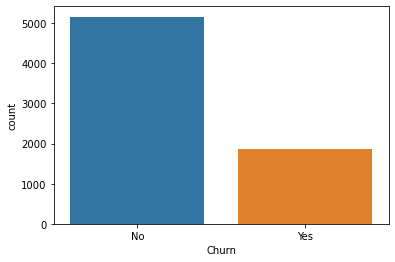

In [7]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

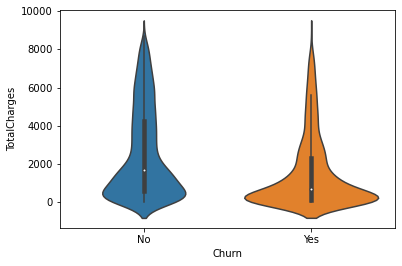

In [8]:
# Check the distribution of TotalCharges bewteen Churn categories
sns.violinplot(data=df, x='Churn', y='TotalCharges')

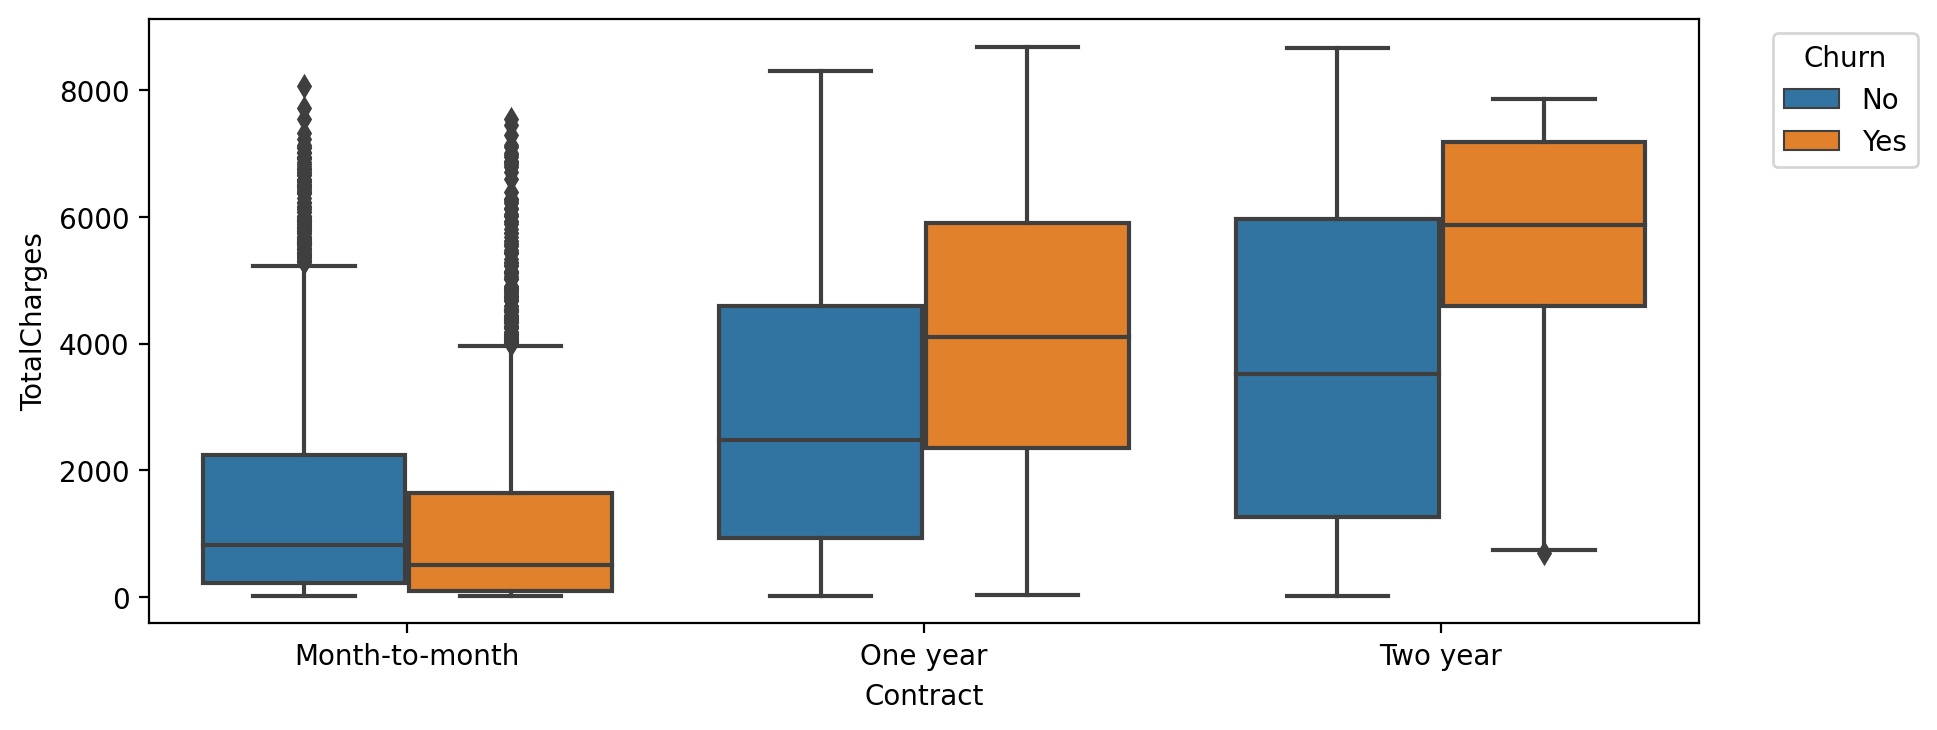

In [9]:
# Check the distribution of TotalCharges per Contract type
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(data= df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(bbox_to_anchor=(1.15,1), title='Churn')

In [10]:
# check correlation to the class
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df_corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']], drop_first=True).corr()

In [12]:
df_corr['Churn_Yes'].sort_values().iloc[0:-1]

Contract_Two year                       -0.301552
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
OnlineSecurity_No internet service      -0.227578
InternetService_No                      -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691


In [ ]:
# plot the correlation of the features to the class label

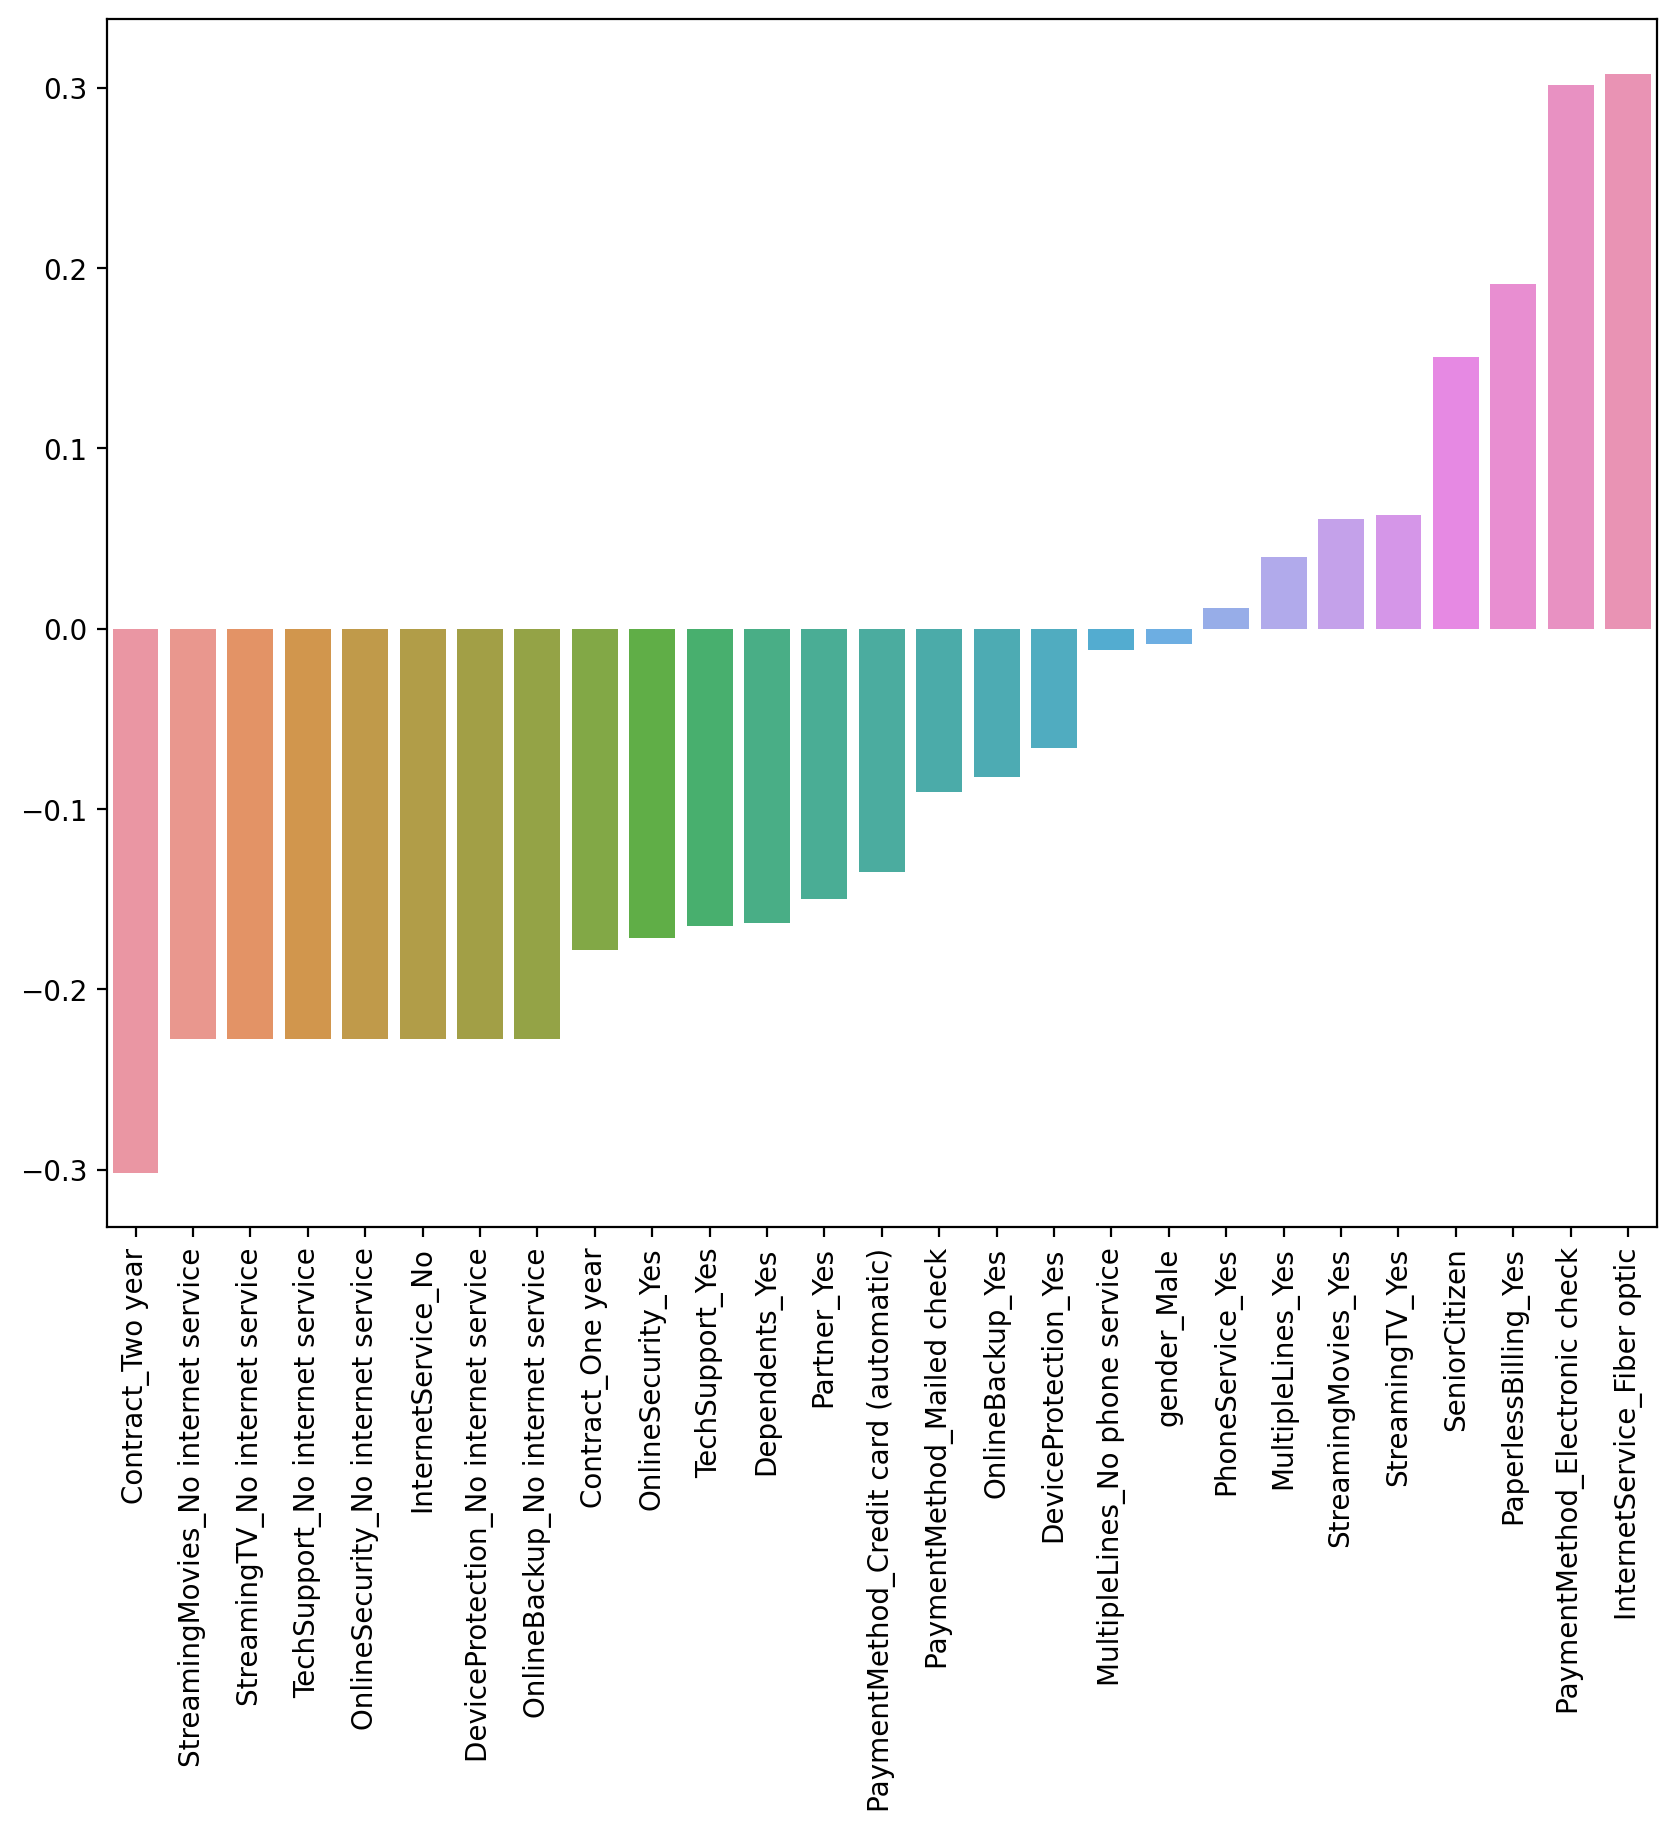

In [20]:
plt.figure(figsize=(10,8), dpi=200)
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[0:-1].index, y=df_corr['Churn_Yes'].sort_values().iloc[0:-1].values);
plt.xticks(rotation='vertical');

### Churn Analysis
* focus segmenting customers based on their tenure
* examine differences between customers cohort segments

In [21]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

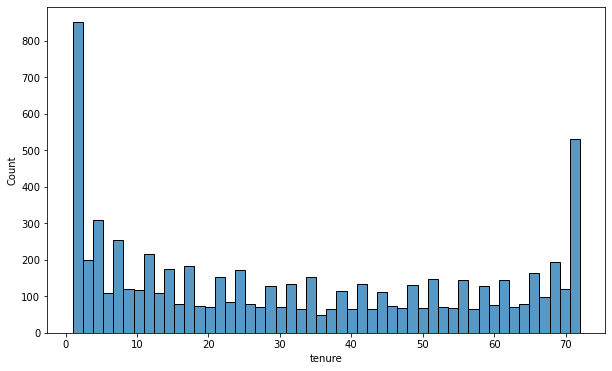

In [26]:
# Check customer's tenure distriibution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', bins=50)

<Figure size 2000x600 with 0 Axes>

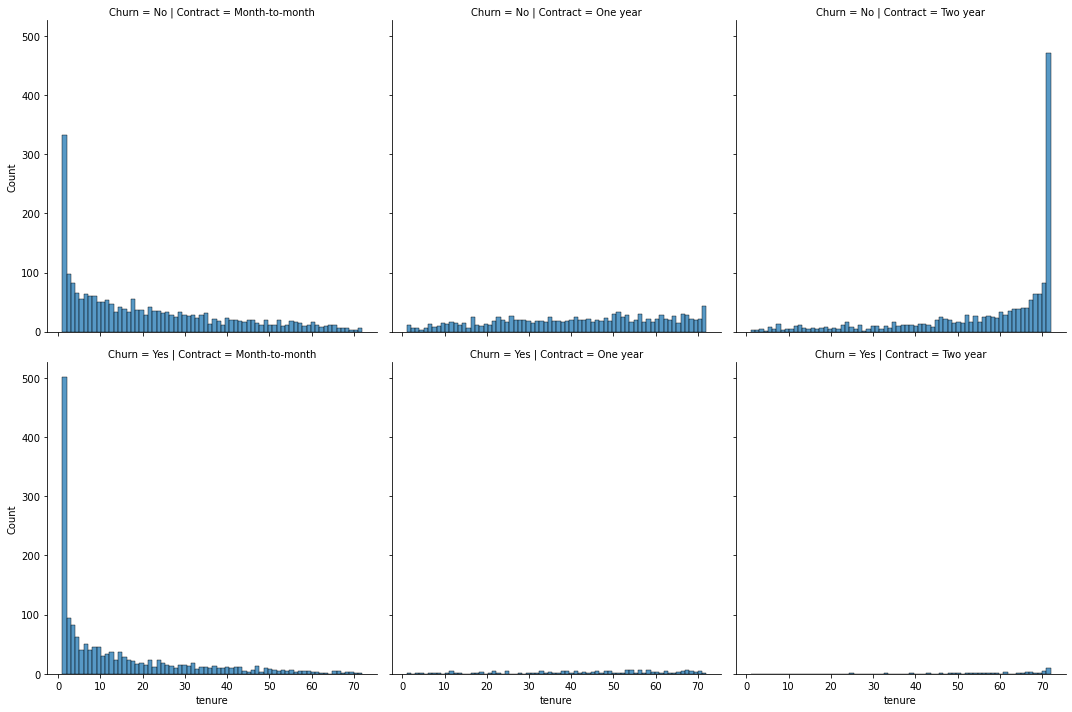

In [35]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

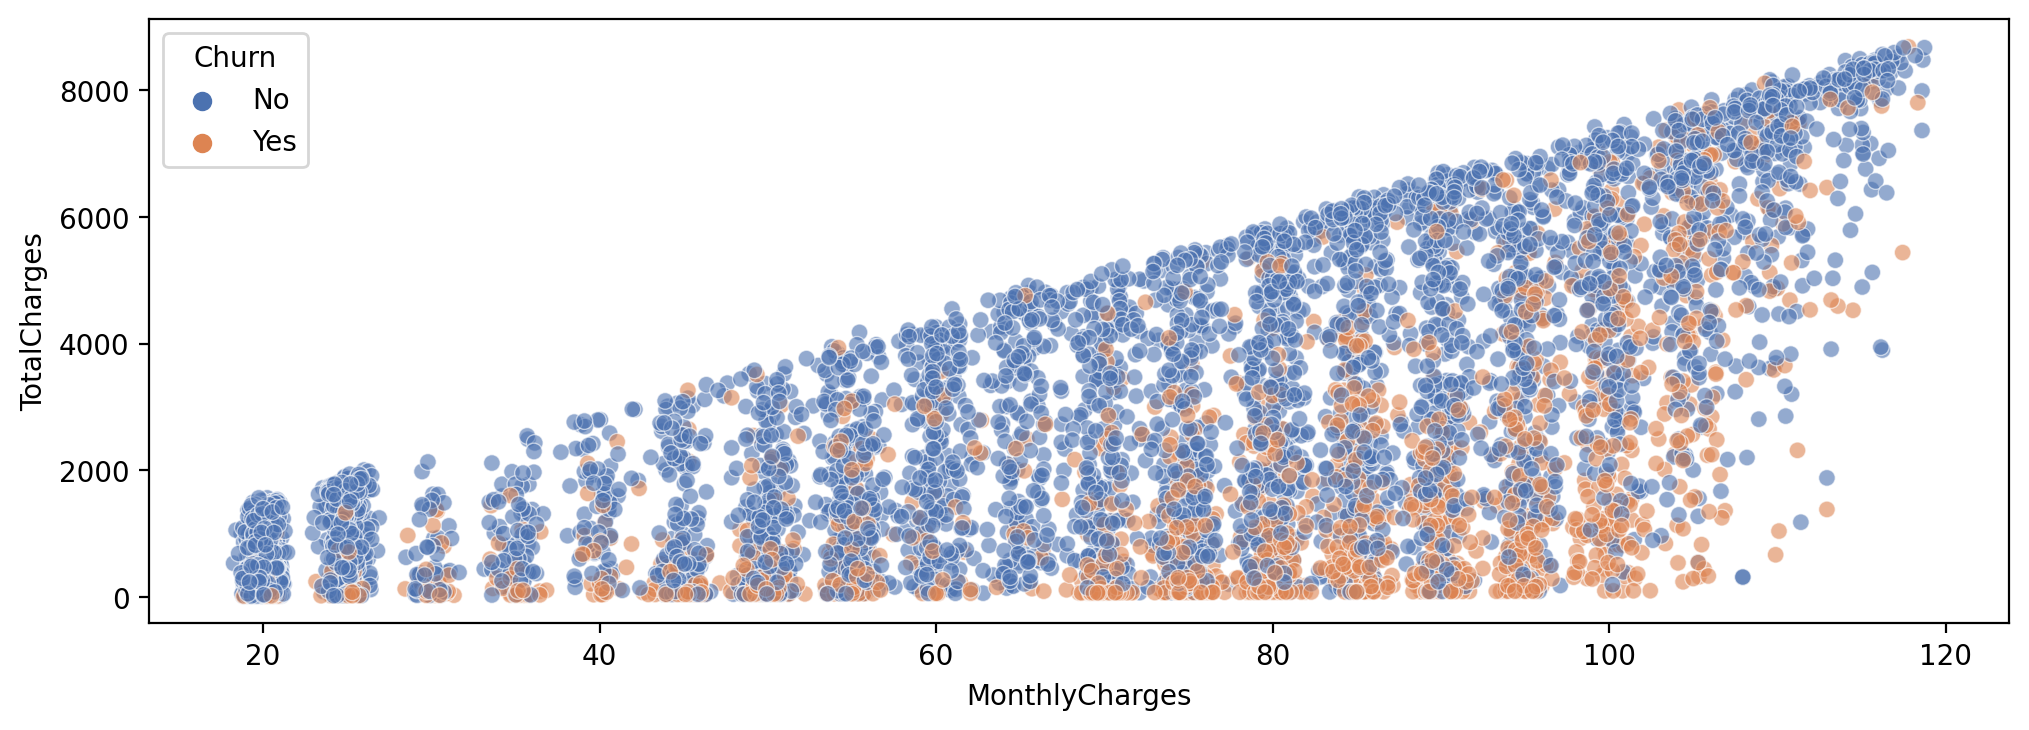

In [40]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', 
               alpha=0.6, palette='deep')

* Creating Cohorts based on Tenure

In [52]:
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']

In [54]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [56]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

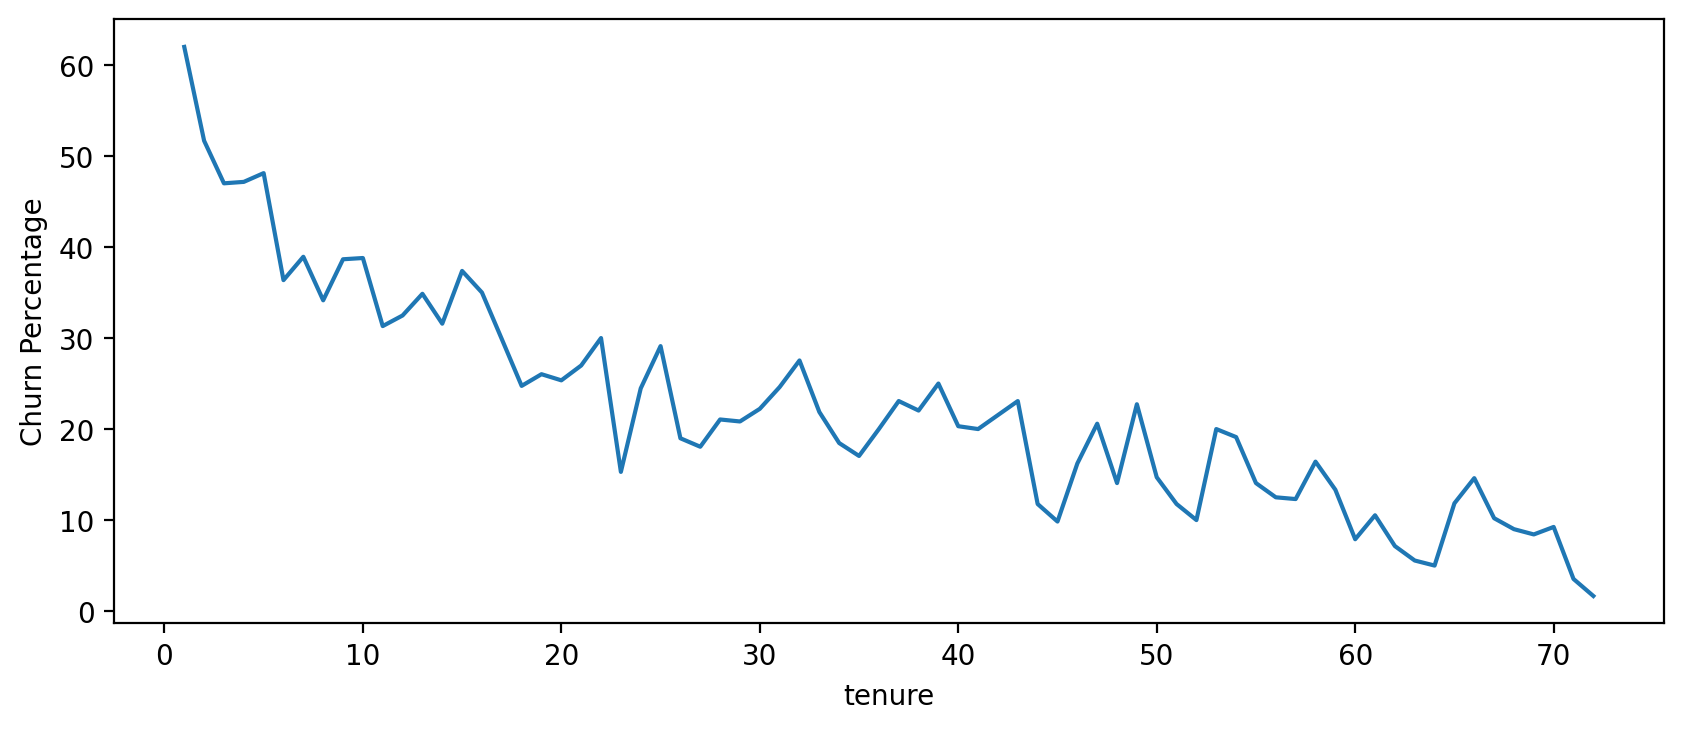

In [60]:
plt.figure(figsize=(10,4), dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

* Create a new column called Tenure Cohort that creates 4 separate categories:

In [72]:
 def category(tenure):
        if tenure < 13:
            return '0-12 Months'
        elif tenure < 25:
            return '12-24 Months'
        elif tenure < 49:
            return '24-48 Months'
        else:
            return 'Over 48 Months'
        
            

In [73]:
df['Tenure Cohort'] = df['tenure'].apply(category)

In [74]:
df[['tenure', 'Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

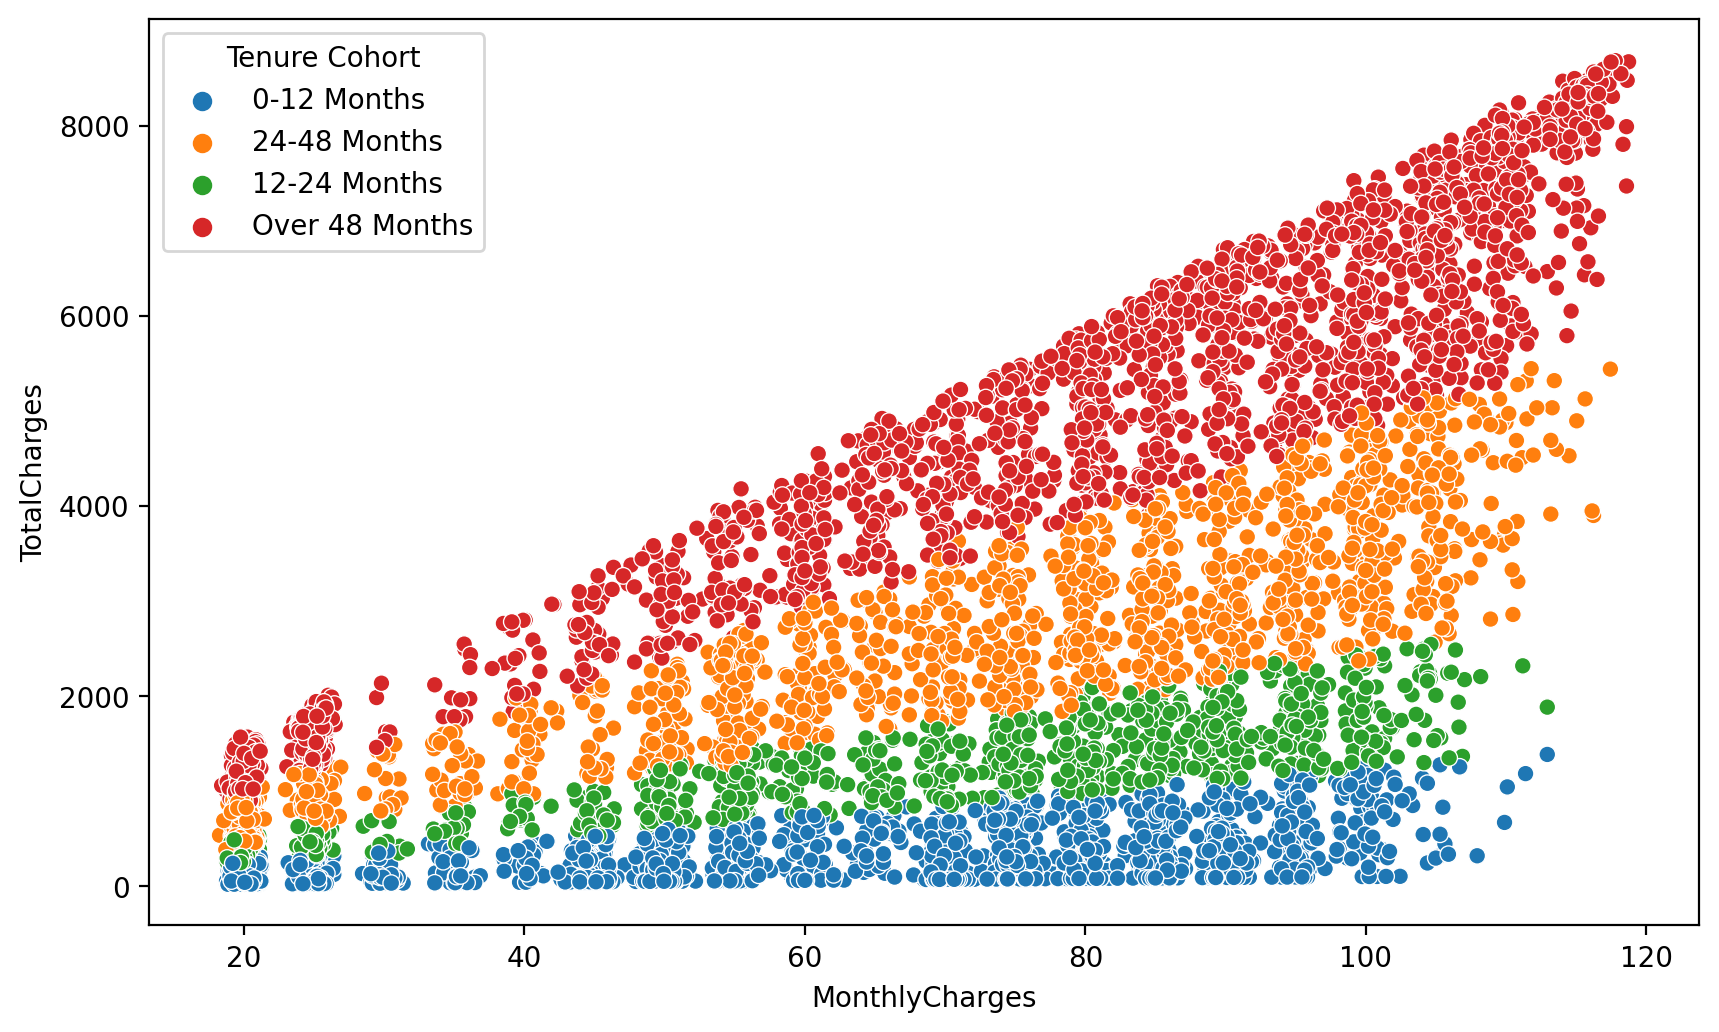

In [77]:
# Total Charges vs Monthly Charts, colored by Tenure Cohort
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data= df, x='MonthlyCharges', y='TotalCharges', hue = 'Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

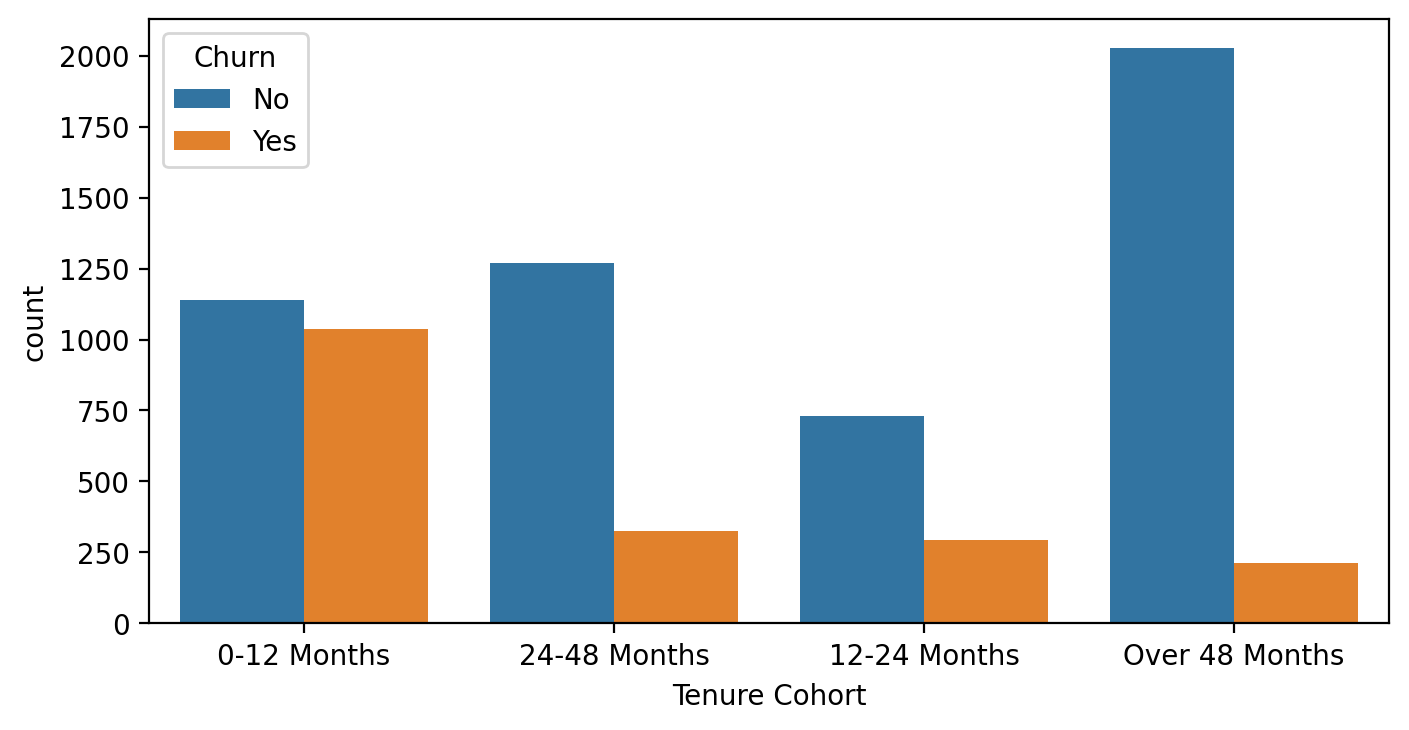

In [89]:
# Churn count per cohort
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue = 'Churn')

<Figure size 1600x800 with 0 Axes>

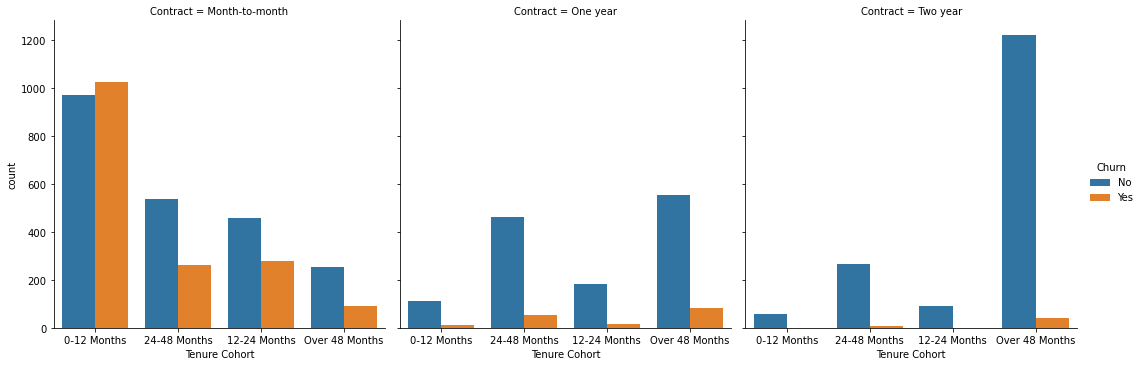

In [102]:
plt.figure(figsize=(8,4), dpi=200)
sns.catplot(data=df,x='Tenure Cohort',col='Contract', hue='Churn', kind='count');

### Predictive Modeling
* Single Decision Tree
* Random Forest
* AdaBoost
* Gradient Boosting

In [211]:
# Single Decision Tree
# Separate out the data into X features and Y label
X = df.drop(['Churn','customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)


In [212]:
y = df['Churn']

In [129]:
# Perform a train test split
from sklearn.model_selection import train_test_split, GridSearchCV

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dt = DecisionTreeClassifier()

In [131]:
# Tune the model
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
grid = GridSearchCV(dt, param_grid)

In [132]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [133]:
grid.best_params_

{'max_depth': 5}

In [134]:
dt = DecisionTreeClassifier(max_depth=5)

In [135]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [137]:
preds = dt.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, plot_confusion_matrix,accuracy_score

In [139]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



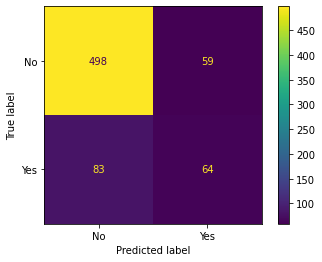

In [140]:
plot_confusion_matrix(dt, X_test, y_test)

In [141]:
feat_import = grid.best_estimator_.feature_importances_

In [143]:
imp_feat = pd.DataFrame(index=X.columns,
                       data = feat_import, 
                       columns=['Importance'])

In [146]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005]

Text(0.5, 1.0, 'Feature Importance for Decision Tree')

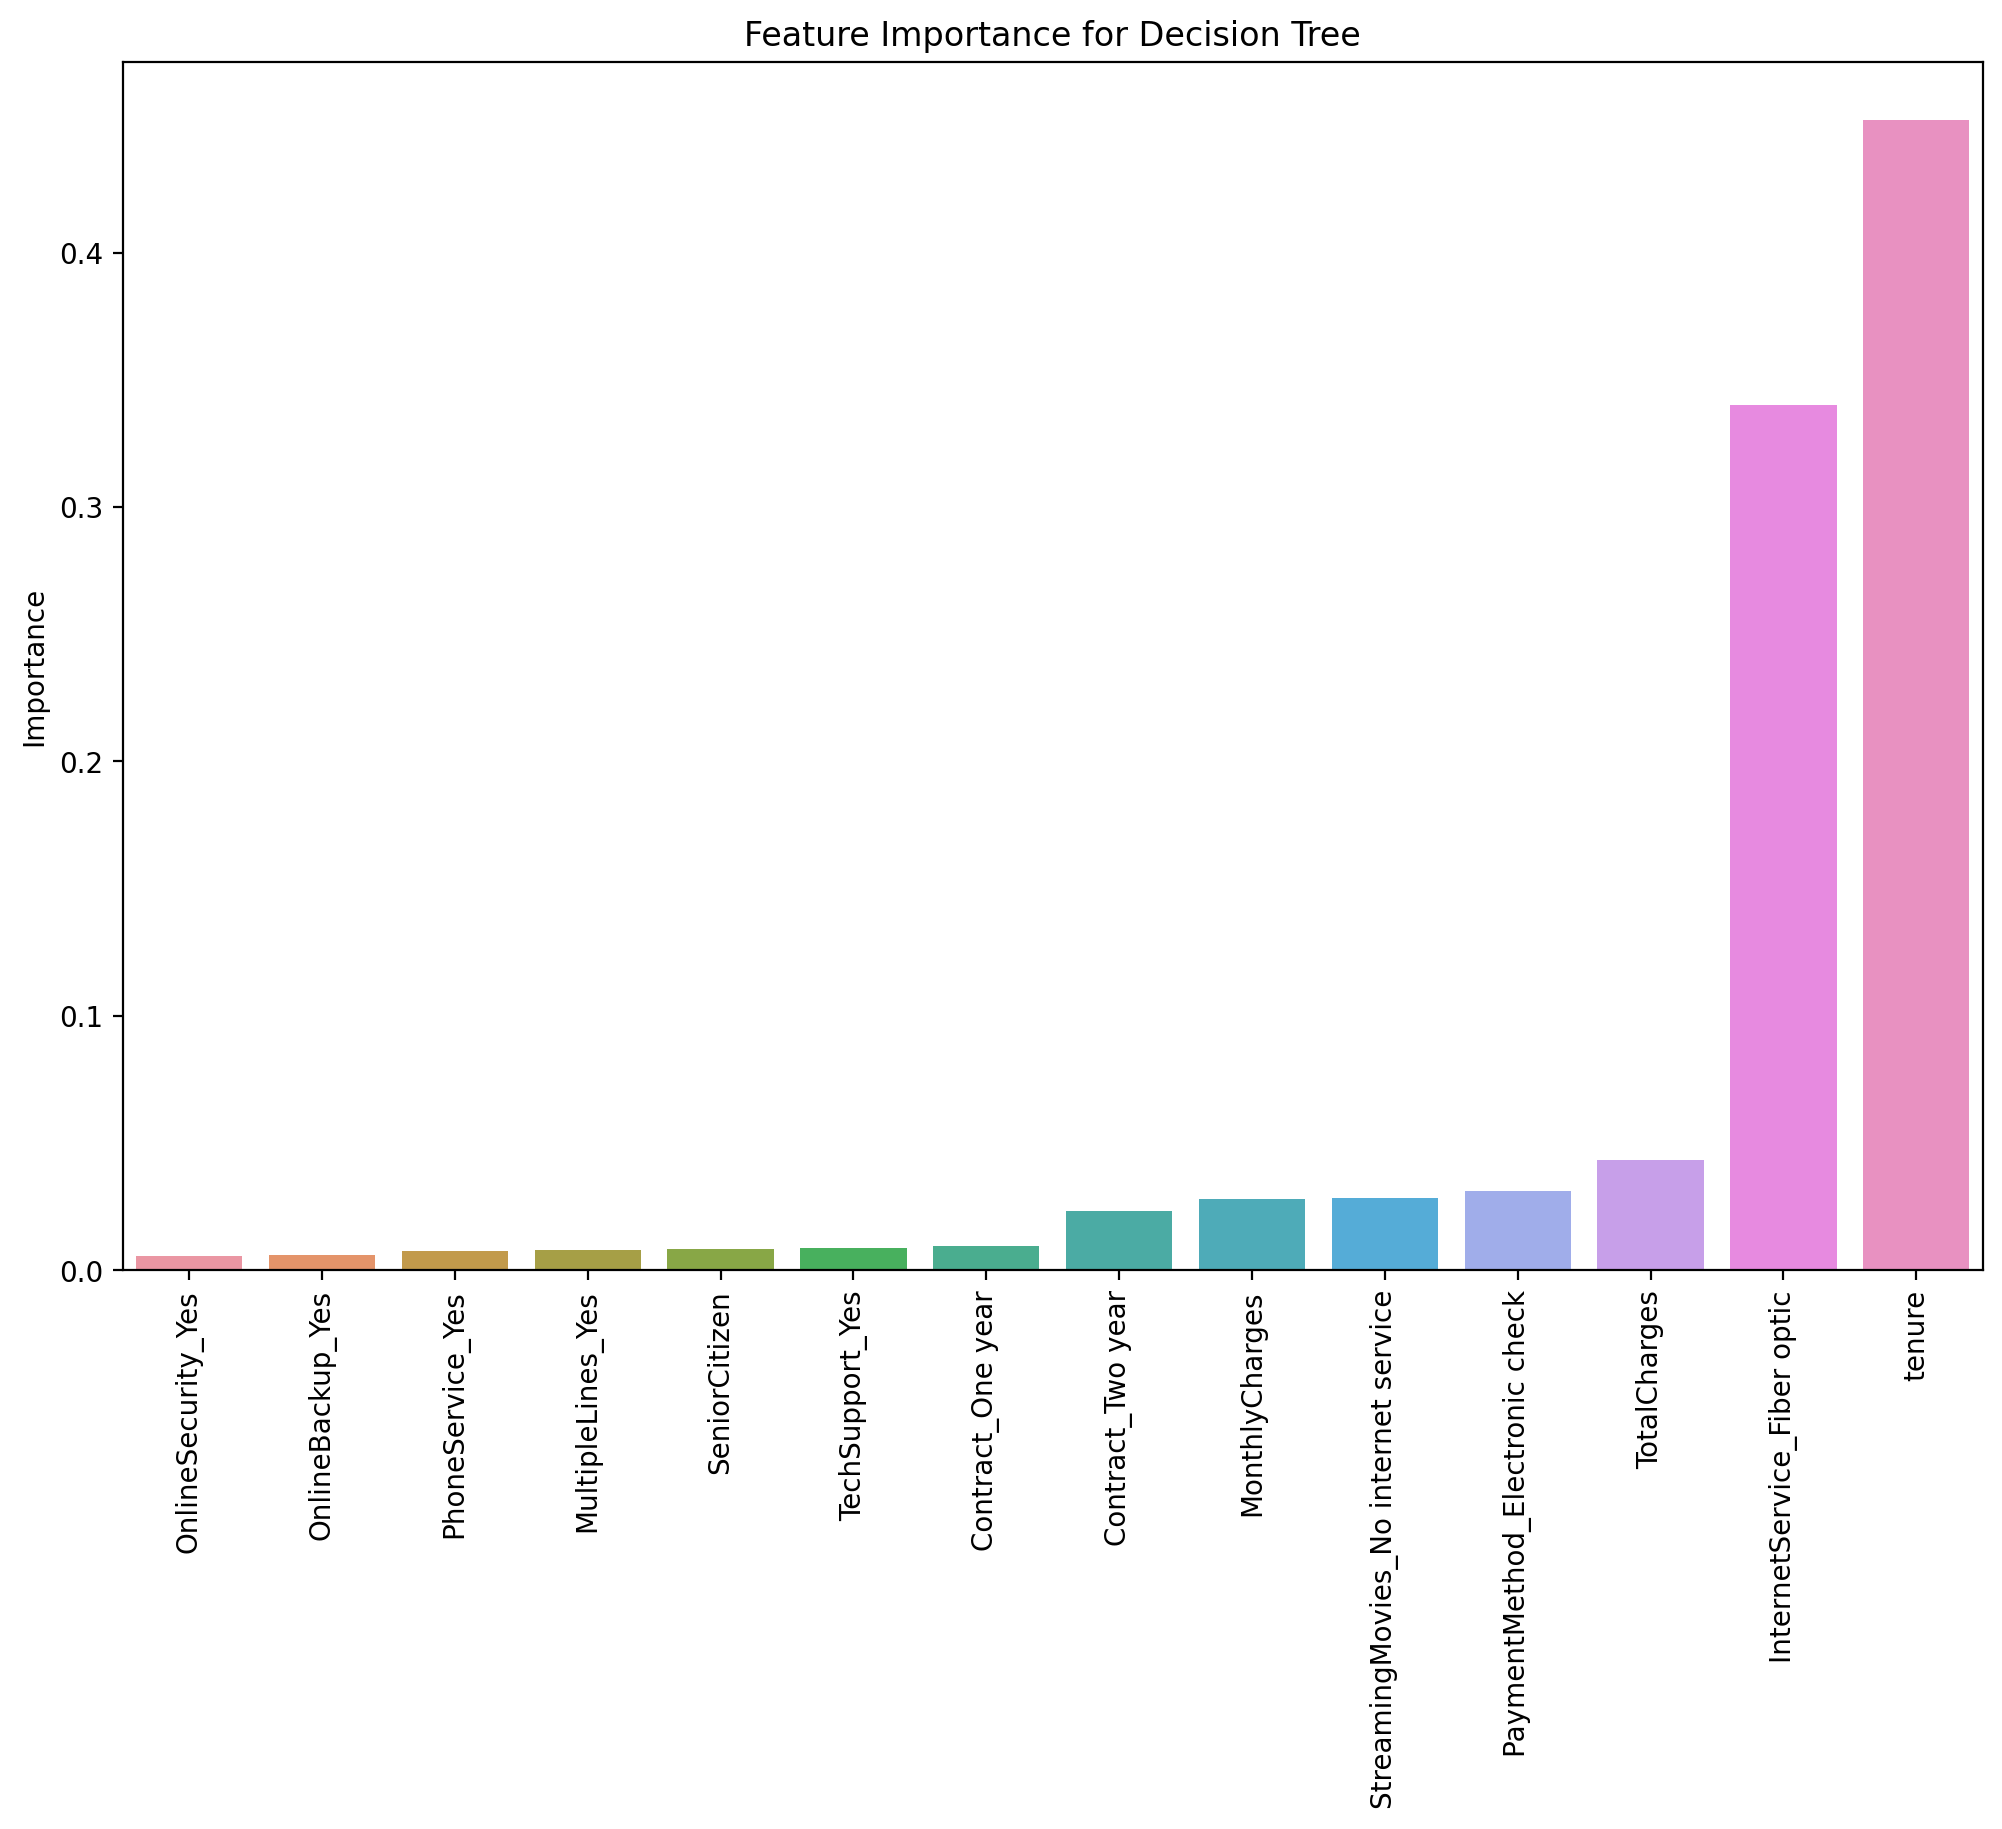

In [148]:
imp_feat = imp_feat.sort_values('Importance')

plt.figure(figsize=(12,8), dpi=200)
sns.barplot(data=imp_feat,
           x=imp_feat.index,
           y='Importance')
plt.xticks(rotation=90);
plt.title('Feature Importance for Decision Tree');

In [149]:
from sklearn.tree import plot_tree

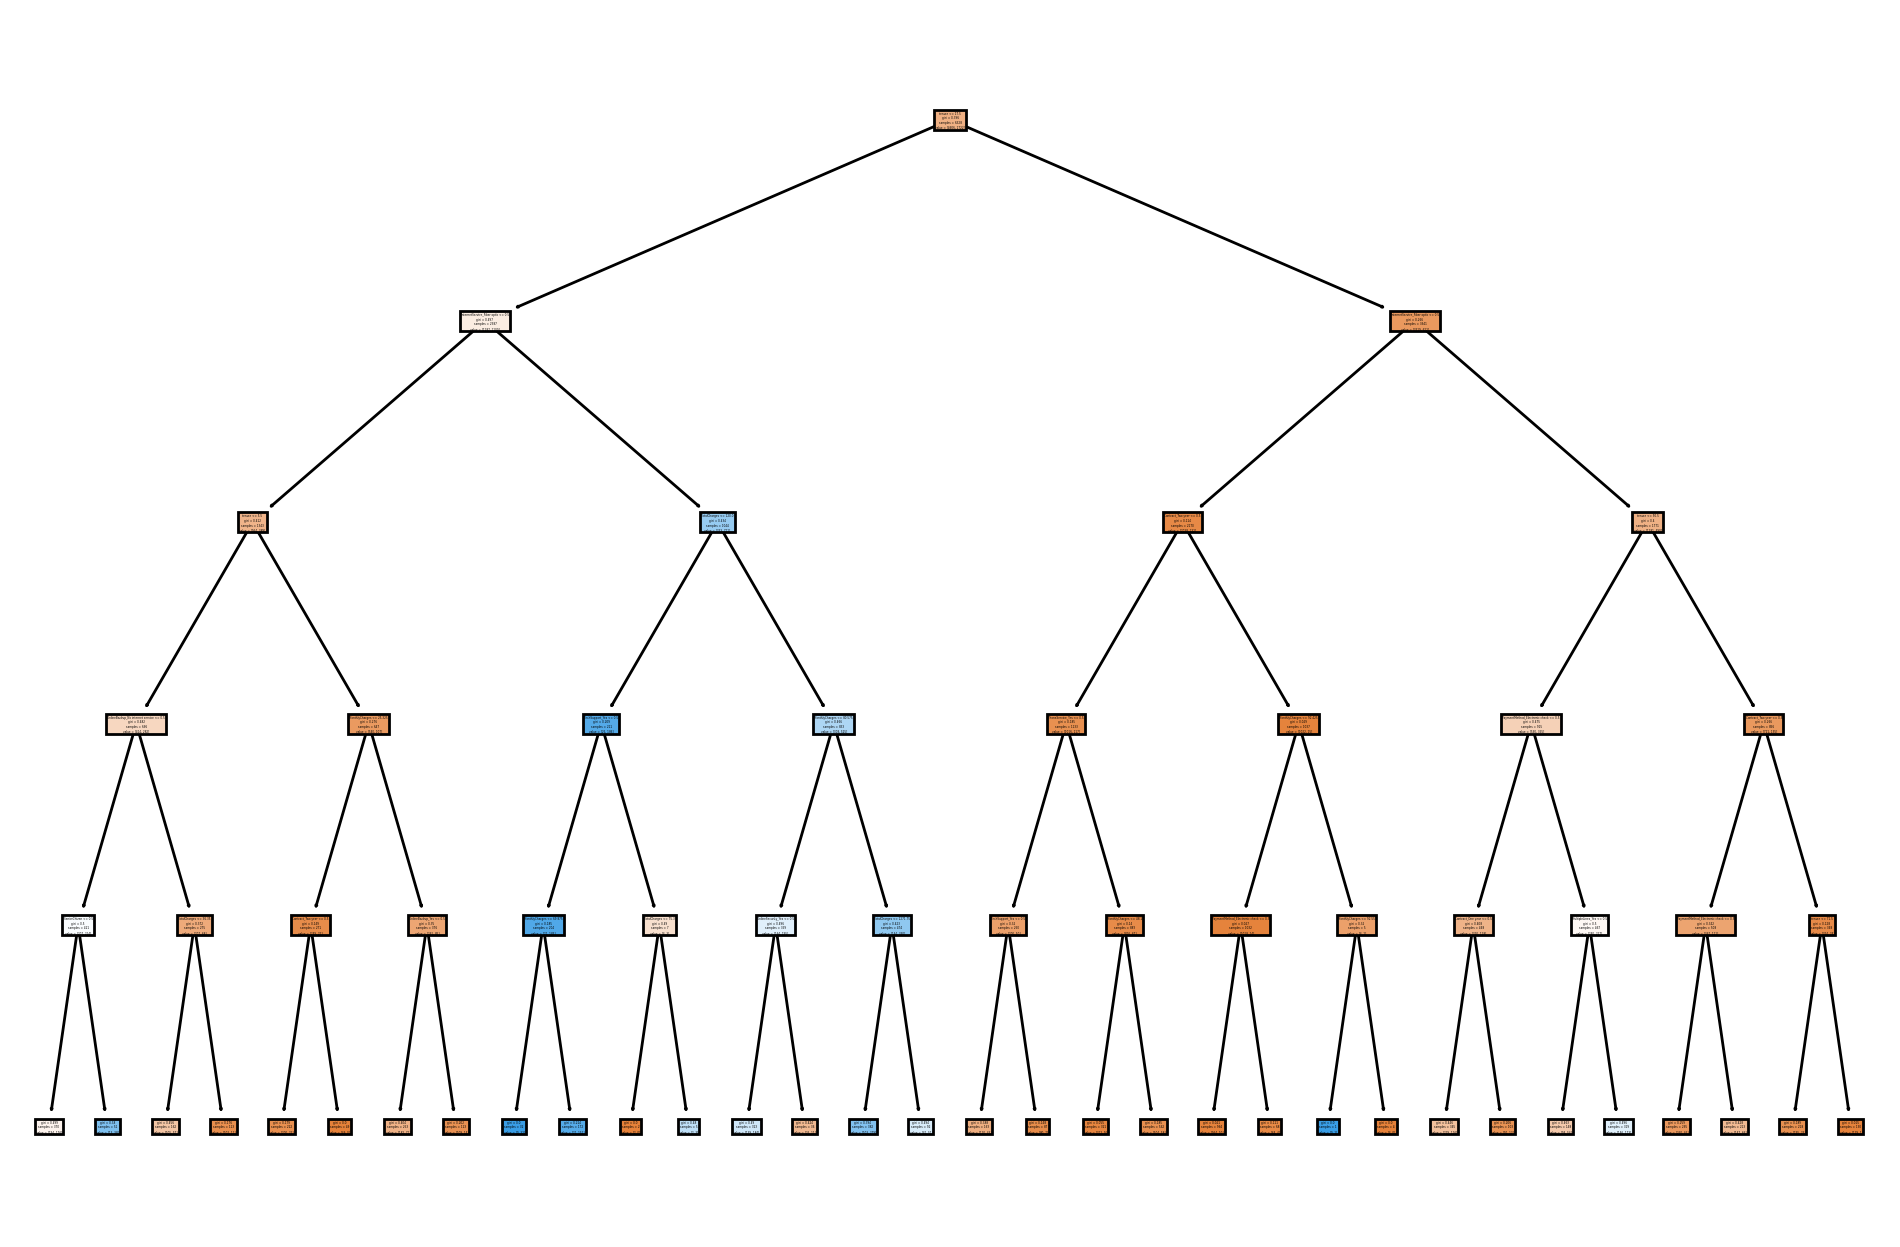

In [151]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(dt, feature_names=X.columns, filled=True);

## Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
rfc = RandomForestClassifier(n_estimators=150)

In [222]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [223]:
rfc_preds = rfc.predict(X_test)

In [224]:
print(classification_report(y_test, rfc_preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.53      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.79      0.80      0.80       704



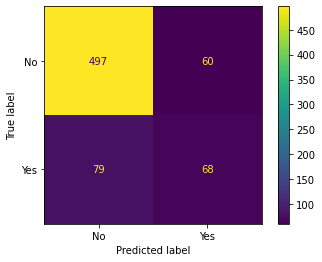

In [225]:
plot_confusion_matrix(rfc, X_test, y_test)

## Boosted Trees

* Use AdaBoost or Gradient Boosting to create a model

In [180]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [233]:
# AdaBoost
ada_model = AdaBoostClassifier()

In [234]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [235]:
ada_preds = ada_model.predict(X_test)

In [236]:
print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



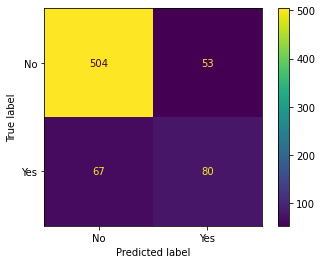

In [237]:
plot_confusion_matrix(ada_model, X_test, y_test)

In [226]:
# Gradient Boosting

In [238]:
gb_model = GradientBoostingClassifier()

In [239]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [240]:
gb_preds = gb_model.predict(X_test)

In [241]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



## Result
* I got best performance from an AdaBoostClassifier with 0.83 of accuracy, but I did not use gridsearchCV to find best hyperparameters, and the models performed about the same on the data set. Therefore, I need to find optimal hyperparameters with further research.